In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import imblearn
%matplotlib inline

In [2]:
# 42 columns present in the datset
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

# Load NSL_KDD train dataset
dfkdd_train = pd.read_table("KDDTrain.txt", sep=",", names=datacols)
dfkdd_train = dfkdd_train.iloc[:,:-1]

# Load NSL_KDD test dataset
dfkdd_test = pd.read_table("KDDTest.txt", sep=",", names=datacols)
dfkdd_test = dfkdd_test.iloc[:,:-1]

In [3]:
dfkdd_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
dfkdd_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [5]:
print('Train set dimension: {} rows, {} columns'.format(dfkdd_train.shape[0], dfkdd_train.shape[1]))

Train set dimension: 125973 rows, 42 columns


In [6]:
dfkdd_test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [7]:
print('Test set dimension: {} rows, {} columns'.format(dfkdd_test.shape[0], dfkdd_test.shape[1]))

Test set dimension: 22544 rows, 42 columns


In [8]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [9]:
dfkdd_train['attack_class'] = dfkdd_train['attack'].apply(lambda x: mapping[x])
dfkdd_test['attack_class'] = dfkdd_test['attack'].apply(lambda x: mapping[x])

In [10]:
dfkdd_train.drop(['attack'], axis=1, inplace=True)
dfkdd_test.drop(['attack'], axis=1, inplace=True)

In [11]:
dfkdd_train['attack_class'].value_counts()

Normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: attack_class, dtype: int64

In [12]:
dfkdd_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [13]:
dfkdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
dfkdd_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
dfkdd_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [15]:
attack_class_freq_train = dfkdd_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = dfkdd_test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


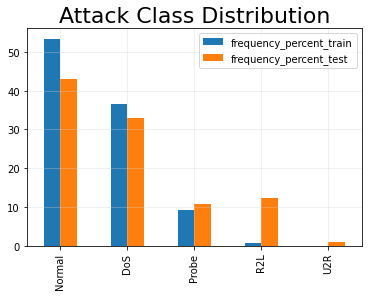

<Figure size 1440x1440 with 0 Axes>

In [16]:
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar")
plt.figure(figsize=(20,20));
plot.set_title("Attack Class Distribution", fontsize=22)
plot.grid(color='lightgray', alpha=0.4)
plot.legend()

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = dfkdd_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(dfkdd_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(dfkdd_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [18]:
sc_traindf.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387


In [19]:
sc_traindf.shape

(125973, 37)

In [20]:
sc_traindf['protocol_type'] = dfkdd_train['protocol_type']
sc_traindf['service'] = dfkdd_train['service']
sc_traindf['flag'] = dfkdd_train['flag']
sc_traindf['attack_class'] = dfkdd_train['attack_class']

In [21]:
sc_testdf['protocol_type'] = dfkdd_test['protocol_type']
sc_testdf['service'] = dfkdd_test['service']
sc_testdf['flag'] = dfkdd_test['flag']
sc_testdf['attack_class'] = dfkdd_test['attack_class']

In [22]:
from sklearn.preprocessing import LabelEncoder
sc_traindf = sc_traindf.apply(LabelEncoder().fit_transform)
sc_testdf = sc_testdf.apply(LabelEncoder().fit_transform)

In [23]:
sc_traindf.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,0,482,0,0,0,0,0,0,0,0,...,17,0,0,0,5,0,1,20,9,1
1,0,143,0,0,0,0,0,0,0,0,...,88,0,0,0,0,0,2,44,9,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,100,99,0,0,1,49,5,0
3,0,229,5608,0,0,0,0,0,1,0,...,3,4,3,1,0,1,1,24,9,1
4,0,196,405,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,24,9,1


In [24]:
sc_traindf['attack_class'].value_counts()

1    67343
0    45927
2    11656
3      995
4       52
Name: attack_class, dtype: int64

In [25]:
Y_train = sc_traindf['attack_class']
Y_test = sc_testdf['attack_class']

sc_traindf.drop(['attack_class'], axis=1, inplace=True)
sc_testdf.drop(['attack_class'], axis=1, inplace=True)

In [26]:
Y_train = np.array(Y_train).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)

X_train = np.array(sc_traindf)
X_test = np.array(sc_testdf)

In [32]:
X_test.shape

(22544, 40)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train);
            
# Train RandomForestClassifier Model
RF_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
RF_Classifier.fit(X_train, Y_train);  

# Train SVM Model
SVC_Classifier = SVC(random_state=0)
SVC_Classifier.fit(X_train, Y_train)

## Train Ensemble Model (This method combines all the individual models above except RandomForest)
combined_model = [('Naive Baye Classifier', BNB_Classifier), 
                 ('Decision Tree Classifier', DTC_Classifier), 
                 ('KNeighborsClassifier', KNN_Classifier), 
                 ('LogisticRegression', LGR_Classifier)
                ]
VotingClassifier =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
VotingClassifier.fit(X_train, Y_train)

VotingClassifier(estimators=[('Naive Baye Classifier', BernoulliNB()),
                             ('Decision Tree Classifier',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_jobs=-1)),
                             ('LogisticRegression',
                              LogisticRegression(n_jobs=-1, random_state=0))],
                 n_jobs=-1, voting='soft')

In [33]:
from sklearn import metrics
classification = metrics.classification_report(Y_test, RF_Classifier.predict(X_test))
print(classification)

              precision    recall  f1-score   support

           0       0.96      0.72      0.83      7458
           1       0.63      0.98      0.76      9711
           2       0.86      0.66      0.74      2421
           3       1.00      0.00      0.01      2754
           4       0.67      0.01      0.02       200

    accuracy                           0.73     22544
   macro avg       0.82      0.47      0.47     22544
weighted avg       0.81      0.73      0.68     22544



In [34]:
from sklearn import metrics
classification = metrics.classification_report(Y_test, SVC_Classifier.predict(X_test))
print(classification)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      7458
           1       0.66      0.93      0.77      9711
           2       0.78      0.72      0.75      2421
           3       0.00      0.00      0.00      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.74     22544
   macro avg       0.47      0.49      0.47     22544
weighted avg       0.66      0.74      0.69     22544



In [35]:
from sklearn import metrics
classification = metrics.classification_report(Y_test, DTC_Classifier.predict(X_test))
print(classification)

              precision    recall  f1-score   support

           0       0.96      0.77      0.85      7458
           1       0.67      0.97      0.79      9711
           2       0.68      0.63      0.66      2421
           3       0.91      0.05      0.09      2754
           4       0.62      0.05      0.09       200

    accuracy                           0.75     22544
   macro avg       0.77      0.49      0.50     22544
weighted avg       0.80      0.75      0.71     22544



In [36]:
from sklearn import metrics
classification = metrics.classification_report(Y_test, KNN_Classifier.predict(X_test))
print(classification)

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      7458
           1       0.67      0.97      0.79      9711
           2       0.76      0.73      0.74      2421
           3       0.19      0.00      0.00      2754
           4       1.00      0.01      0.02       200

    accuracy                           0.76     22544
   macro avg       0.71      0.50      0.48     22544
weighted avg       0.72      0.76      0.71     22544



In [37]:
from sklearn import metrics
classification = metrics.classification_report(Y_test, VotingClassifier.predict(X_test))
print(classification)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      7458
           1       0.67      0.98      0.80      9711
           2       0.83      0.77      0.80      2421
           3       1.00      0.00      0.00      2754
           4       0.69      0.04      0.08       200

    accuracy                           0.77     22544
   macro avg       0.83      0.52      0.51     22544
weighted avg       0.83      0.77      0.72     22544



In [41]:
from sklearn import metrics
classification = metrics.classification_report(Y_test, LGR_Classifier.predict(X_test))
print(classification)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      7458
           1       0.65      0.93      0.76      9711
           2       0.78      0.80      0.79      2421
           3       0.26      0.00      0.00      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.73     22544
   macro avg       0.52      0.49      0.47     22544
weighted avg       0.69      0.73      0.68     22544



In [45]:
import joblib
  
# Save the model as a pickle in a file 
joblib.dump(SVC_Classifier, 'SVC.pkl')
joblib.dump(BNB_Classifier, 'BNB.pkl')
joblib.dump(DTC_Classifier, 'DTC.pkl')
joblib.dump(RF_Classifier, 'RF.pkl')
joblib.dump(KNN_Classifier, 'KNN.pkl')
joblib.dump(LGR_Classifier, 'LGR.pkl')
joblib.dump(VotingClassifier, 'Voting.pkl')

['Voting.pkl']

In [47]:
import pickle
pickle.dump(RF_Classifier, open('RF.pkl','wb'))

In [46]:
pd.DataFrame(X_test).to_csv('datafortesting.csv', sep = ',')

In [42]:
from random import randrange
i = randrange(22544)
print(i)

xnew = X_test[i].reshape(1, -1)

5033


In [43]:
ynew = RF_Classifier.predict(xnew)
ynew

array([2])

In [55]:
TestingDF = pd.DataFrame(X_test)

In [63]:
TestingDF['class'] = pd.DataFrame(RF_Classifier.predict(X_test))

In [69]:
TestingDF['class'].value_counts()

1    15083
0     5587
2     1859
3       12
4        3
Name: class, dtype: int64

In [74]:
df_normal = TestingDF.loc[TestingDF['class'] == 1]
df_normal.drop(['class'], axis=1, inplace=True)
len(df_normal)

15083

In [73]:
df_DOS = TestingDF.loc[TestingDF['class'] == 0]
df_DOS.drop(['class'], axis=1, inplace=True)
len(df_DOS)

5587

In [75]:
df_Probing = TestingDF.loc[TestingDF['class'] == 2]
df_Probing.drop(['class'], axis=1, inplace=True)
len(df_Probing)

1859

In [76]:
df_R2L = TestingDF.loc[TestingDF['class'] == 3]
df_R2L.drop(['class'], axis=1, inplace=True)
len(df_R2L)

12

In [77]:
df_U2R = TestingDF.loc[TestingDF['class'] == 4]
df_U2R.drop(['class'], axis=1, inplace=True)
len(df_U2R)

3

In [78]:
pd.DataFrame(df_normal).to_csv('df_normal.csv', sep = ',')
pd.DataFrame(df_DOS).to_csv('df_DOS.csv', sep = ',')
pd.DataFrame(df_Probing).to_csv('df_Probing.csv', sep = ',')
pd.DataFrame(df_R2L).to_csv('df_R2L.csv', sep = ',')
pd.DataFrame(df_U2R).to_csv('df_U2R.csv', sep = ',')